# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

#### 1. Summary: I will be evaluating the at-fault rates for pedestrian-involved collisions in California. In many major cities in California, pedestrians are found at fault between 60-80% of the time for fatal collisions in which they are the killed victims. I will be analyzing spatial trends and possible correlation between these rates for fatal and severe collisions and other urban geography features of major urban areas in California. 

#### 2.a. Accessing dataset 1: SWITRS collision data (.csv)

In [1]:
import pandas as pd
df = pd.read_csv('CAcity_crashes_ped_FandS_2012to2021.csv')
df.head()

/Users/rachelstrangeway/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/rachelstrangeway/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/7p/z4qnh93942q52s0bs8hkz6yw0000gn/T/ipykernel_5480/3203815586.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CAcity_crashes_ped_FandS_2012to2021.csv')


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,6482664,2014,4/23/16,9590,4/23/14,115,020229,NaN,3,3,...,0,0,-,-,34.070310,-118.261010,LOS ANGELES,LOS ANGELES,-118.251376,34.065026
1,7190140,2016,9/26/18,1942,3/17/16,2245,40971,1273,4,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.310239,33.959960
2,91854786,2021,8/31/22,9590,11/23/21,1857,017878,NaN,2,2,...,0,0,-,-,34.055069,-118.201103,LOS ANGELES,LOS ANGELES,-118.201103,34.055080
3,91066816,2019,9/4/19,9590,2/22/19,1930,021789,NaN,5,2,...,0,0,-,-,34.064240,-118.250572,LOS ANGELES,LOS ANGELES,-118.250572,34.064240
4,91359442,2020,12/4/20,9530,8/23/20,358,021871,NaN,7,3,...,0,0,-,-,33.753769,-118.291252,LOS ANGELES,LOS ANGELES,-118.291252,33.753769


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

/Users/rachelstrangeway/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df.columns.values.tolist()

['CASE_ID',
 'ACCIDENT_YEAR',
 'PROC_DATE',
 'JURIS',
 'COLLISION_DATE',
 'COLLISION_TIME',
 'OFFICER_ID',
 'REPORTING_DISTRICT',
 'DAY_OF_WEEK',
 'CHP_SHIFT',
 'POPULATION',
 'CNTY_CITY_LOC',
 'SPECIAL_COND',
 'BEAT_TYPE',
 'CHP_BEAT_TYPE',
 'CITY_DIVISION_LAPD',
 'CHP_BEAT_CLASS',
 'BEAT_NUMBER',
 'PRIMARY_RD',
 'SECONDARY_RD',
 'DISTANCE',
 'DIRECTION',
 'INTERSECTION',
 'WEATHER_1',
 'WEATHER_2',
 'STATE_HWY_IND',
 'CALTRANS_COUNTY',
 'CALTRANS_DISTRICT',
 'STATE_ROUTE',
 'ROUTE_SUFFIX',
 'POSTMILE_PREFIX',
 'POSTMILE',
 'LOCATION_TYPE',
 'RAMP_INTERSECTION',
 'SIDE_OF_HWY',
 'TOW_AWAY',
 'COLLISION_SEVERITY',
 'NUMBER_KILLED',
 'NUMBER_INJURED',
 'PARTY_COUNT',
 'PRIMARY_COLL_FACTOR',
 'PCF_CODE_OF_VIOL',
 'PCF_VIOL_CATEGORY',
 'PCF_VIOLATION',
 'PCF_VIOL_SUBSECTION',
 'HIT_AND_RUN',
 'TYPE_OF_COLLISION',
 'MVIW',
 'PED_ACTION',
 'ROAD_SURFACE',
 'ROAD_COND_1',
 'ROAD_COND_2',
 'LIGHTING',
 'CONTROL_DEVICE',
 'CHP_ROAD_TYPE',
 'PEDESTRIAN_ACCIDENT',
 'BICYCLE_ACCIDENT',
 'MOTORCYC

In [4]:
citydata = pd.read_csv('citydata.csv')
citydata.head(20)

,city,land_area_sq_mi,walk_transit_mode_share,walk_score,pop_thousands
0,LOS ANGELES,469.49,0.111,69,3890
1,SAN DIEGO,325.88,0.057,53,1385
2,SAN JOSE,178.26,0.056,51,1011
3,SAN FRANCISCO,46.91,0.431,89,870
4,FRESNO,115.80,0.028,47,542
5,BAKERSFIELD,149.78,0.015,37,403
6,STOCKTON,62.17,0.027,44,320
7,SACRAMENTO,97.20,0.058,49,523
8,LONG BEACH,50.30,0.079,73,465
9,OAKLAND,55.90,0.249,75,439


#### 3. Clean the SWITRS dataset

In [5]:
df2 = df[['CASE_ID','ACCIDENT_YEAR','JURIS','COLLISION_DATE','COLLISION_TIME','INTERSECTION','STATE_HWY_IND','COLLISION_SEVERITY','NUMBER_KILLED','NUMBER_INJURED','PED_ACTION','PRIMARY_COLL_FACTOR','PCF_VIOL_CATEGORY','STWD_VEHTYPE_AT_FAULT','COUNTY','CITY','POINT_X','POINT_Y']]
df2.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PED_ACTION,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,STWD_VEHTYPE_AT_FAULT,COUNTY,CITY,POINT_X,POINT_Y
0,6482664,2014,9590,4/23/14,115,N,Y,2,0,1,E,A,03,A,LOS ANGELES,LOS ANGELES,-118.251376,34.065026
1,7190140,2016,1942,3/17/16,2245,N,N,1,1,0,D,A,11,N,LOS ANGELES,LOS ANGELES,-118.310239,33.959960
2,91854786,2021,9590,11/23/21,1857,N,Y,1,1,0,E,A,11,N,LOS ANGELES,LOS ANGELES,-118.201103,34.055080
3,91066816,2019,9590,2/22/19,1930,N,Y,1,1,0,E,A,11,N,LOS ANGELES,LOS ANGELES,-118.250572,34.064240
4,91359442,2020,9530,8/23/20,358,N,Y,1,1,1,E,C,18,-,LOS ANGELES,LOS ANGELES,-118.291252,33.753769


In [6]:
ped_action_to_name = {
    'A': 'No Pedestrian Involved', 'B': 'Crossing in Crosswalk at Intersection', 'C': 'Crossing in Crosswalk Not at Intersection', 'D': 'Crossing Not in Crosswalk', 'E': 'In Road, Including Shoulder',
    'F': 'Not in Road', 'G': 'Approaching/Leaving School Bus', '-': 'Not Stated'}
primary_col_factor_to_name = {
    'A': 'Vehicle Code Violation', 'B': 'Other Improper Driving', 'C': 'Other Than Driver', 'D': 'Unknown', 'E': 'Fell Asleep', '-': 'Not Stated'}
pcf_viol_category_to_name = {
    '01': 'Driving or Bicycling Under the Influence of Alcohol or Drug', '02': 'Impeding Traffic', '03': 'Unsafe Speed', '04': 'Following Too Closely', '05': 'Wrong Side of Road',
    '06': 'Improper Passing', '07': 'Unsafe Lane Change', '08': 'Improper Turning', '09': 'Automobile Right of Way',
    '10': 'Pedestrian Right of Way', '11': 'Pedestrian Violation', '12': 'Traffic Signals and Signs', '13': 'Hazardous Parking',
    '14': 'Lights', '15': 'Brakes', '16': 'Other Equipment', '17': 'Other Hazardous Violation',
    '18': 'Other Than Driver or Pedestrian', '21': 'Unsafe Starting or Backing', '22': 'Other Improper Driving', '23': 'Pedestrian or Other Under the Influence of Alcohol or Drug','24': 'Fell Asleep','00': 'Unknown','-': 'Not Stated'}
veh_type_atfault_to_name = {
    'A': 'Passenger Car/Station Wagon', 'B': 'Passenger Car with Trailer', 'C': 'Motorcycle/Scooter', 'D': 'Pickup or Panel Truck', 'E': 'Pickup or Panel Truck with Trailer', 
    'F': 'Truck or Truck Tractor', 'G': 'Truck or Truck Tractor with Trailer', 'H': 'Schoolbus', 'I': 'Other Bus', 'J': 'Emergency Vehicle',
    'K': 'Highway Construction Equipment', 'L': 'Bicycle', 'M': 'Other Vehicle', 'N': 'Pedestrian', 'O': 'Moped','-': 'Not Stated'}

In [7]:
df2.insert(11, 'ped_action_name', df2['PED_ACTION'].replace(ped_action_to_name))
df2.head(3)

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,PED_ACTION,ped_action_name,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,STWD_VEHTYPE_AT_FAULT,COUNTY,CITY,POINT_X,POINT_Y
0,6482664,2014,9590,4/23/14,115,N,Y,2,0,1,E,"In Road, Including Shoulder",A,03,A,LOS ANGELES,LOS ANGELES,-118.251376,34.065026
1,7190140,2016,1942,3/17/16,2245,N,N,1,1,0,D,Crossing Not in Crosswalk,A,11,N,LOS ANGELES,LOS ANGELES,-118.310239,33.959960
2,91854786,2021,9590,11/23/21,1857,N,Y,1,1,0,E,"In Road, Including Shoulder",A,11,N,LOS ANGELES,LOS ANGELES,-118.201103,34.055080


In [8]:
del df2['PED_ACTION']

In [9]:
df2.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,STWD_VEHTYPE_AT_FAULT,COUNTY,CITY,POINT_X,POINT_Y
0,6482664,2014,9590,4/23/14,115,N,Y,2,0,1,"In Road, Including Shoulder",A,03,A,LOS ANGELES,LOS ANGELES,-118.251376,34.065026
1,7190140,2016,1942,3/17/16,2245,N,N,1,1,0,Crossing Not in Crosswalk,A,11,N,LOS ANGELES,LOS ANGELES,-118.310239,33.959960
2,91854786,2021,9590,11/23/21,1857,N,Y,1,1,0,"In Road, Including Shoulder",A,11,N,LOS ANGELES,LOS ANGELES,-118.201103,34.055080
3,91066816,2019,9590,2/22/19,1930,N,Y,1,1,0,"In Road, Including Shoulder",A,11,N,LOS ANGELES,LOS ANGELES,-118.250572,34.064240
4,91359442,2020,9530,8/23/20,358,N,Y,1,1,1,"In Road, Including Shoulder",C,18,-,LOS ANGELES,LOS ANGELES,-118.291252,33.753769


In [10]:
df2.insert(11, 'prim_col_factor_name', df2['PRIMARY_COLL_FACTOR'].replace(primary_col_factor_to_name))
df2.insert(12, 'pcf_viol_category_name', df2['PCF_VIOL_CATEGORY'].replace(pcf_viol_category_to_name))
df2.insert(12, 'veh_type_atfault_name', df2['STWD_VEHTYPE_AT_FAULT'].replace(veh_type_atfault_to_name))
df2.head(3)

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,...,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,STWD_VEHTYPE_AT_FAULT,COUNTY,CITY,POINT_X,POINT_Y
0,6482664,2014,9590,4/23/14,115,N,Y,2,0,1,...,Vehicle Code Violation,Passenger Car/Station Wagon,Unsafe Speed,A,03,A,LOS ANGELES,LOS ANGELES,-118.251376,34.065026
1,7190140,2016,1942,3/17/16,2245,N,N,1,1,0,...,Vehicle Code Violation,Pedestrian,Pedestrian Violation,A,11,N,LOS ANGELES,LOS ANGELES,-118.310239,33.959960
2,91854786,2021,9590,11/23/21,1857,N,Y,1,1,0,...,Vehicle Code Violation,Pedestrian,Pedestrian Violation,A,11,N,LOS ANGELES,LOS ANGELES,-118.201103,34.055080


In [11]:
del df2['PRIMARY_COLL_FACTOR']
del df2['PCF_VIOL_CATEGORY']
del df2['STWD_VEHTYPE_AT_FAULT']
df2.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y
0,6482664,2014,9590,4/23/14,115,N,Y,2,0,1,"In Road, Including Shoulder",Vehicle Code Violation,Passenger Car/Station Wagon,Unsafe Speed,LOS ANGELES,LOS ANGELES,-118.251376,34.065026
1,7190140,2016,1942,3/17/16,2245,N,N,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.310239,33.959960
2,91854786,2021,9590,11/23/21,1857,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.201103,34.055080
3,91066816,2019,9590,2/22/19,1930,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.250572,34.064240
4,91359442,2020,9530,8/23/20,358,N,Y,1,1,1,"In Road, Including Shoulder",Other Than Driver,Not Stated,Other Than Driver or Pedestrian,LOS ANGELES,LOS ANGELES,-118.291252,33.753769


#### 4.a. Group-by: Collision Severity by Vehicle type at fault

In [12]:
df2.groupby(['COLLISION_SEVERITY'])['CASE_ID'].count()

COLLISION_SEVERITY
1    2882
2    8010
Name: CASE_ID, dtype: int64

In [13]:
df2.groupby(['CITY'])['CASE_ID'].count()

CITY
ANAHEIM           209
BAKERSFIELD       356
BERKELEY          123
FRESNO            315
LONG BEACH        505
LOS ANGELES      5259
OAKLAND           452
OXNARD             95
SACRAMENTO        558
SAN DIEGO         977
SAN FRANCISCO    1053
SAN JOSE          586
STOCKTON          256
THOUSAND OAKS      54
VENTURA            94
Name: CASE_ID, dtype: int64

In [14]:
#turn a groupby into a new dataframe
crashcounts = df2.groupby(['CITY'])['CASE_ID'].count().to_frame(name = 'total_crashes').reset_index()
crashcounts.head(20)

,CITY,total_crashes
0,ANAHEIM,209
1,BAKERSFIELD,356
2,BERKELEY,123
3,FRESNO,315
4,LONG BEACH,505
5,LOS ANGELES,5259
6,OAKLAND,452
7,OXNARD,95
8,SACRAMENTO,558
9,SAN DIEGO,977


In [15]:
df2.groupby(['COLLISION_SEVERITY', 'veh_type_atfault_name'])['CASE_ID'].count().unstack()

veh_type_atfault_name,Bicycle,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Other Vehicle,Passenger Car with Trailer,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Pickup or Panel Truck with Trailer,Schoolbus,Truck or Truck Tractor,Truck or Truck Tractor with Trailer
COLLISION_SEVERITY,,,,,,,,,,,,,,
1,3.0,1.0,9.0,361.0,9.0,NaN,1.0,607.0,1737.0,120.0,4.0,3.0,20.0,7.0
2,45.0,10.0,37.0,1451.0,34.0,14.0,1.0,2405.0,3707.0,254.0,3.0,2.0,40.0,7.0


In [16]:
pd.crosstab(df2['COLLISION_SEVERITY'], df2['veh_type_atfault_name'], margins=True, normalize='index')

veh_type_atfault_name,Bicycle,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Other Vehicle,Passenger Car with Trailer,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Pickup or Panel Truck with Trailer,Schoolbus,Truck or Truck Tractor,Truck or Truck Tractor with Trailer
COLLISION_SEVERITY,,,,,,,,,,,,,,
1,0.001041,0.000347,0.003123,0.125260,0.003123,0.000000,0.000347,0.210618,0.602706,0.041638,0.001388,0.001041,0.006940,0.002429
2,0.005618,0.001248,0.004619,0.181149,0.004245,0.001748,0.000125,0.300250,0.462797,0.031710,0.000375,0.000250,0.004994,0.000874
All,0.004407,0.001010,0.004223,0.166361,0.003948,0.001285,0.000184,0.276533,0.499816,0.034337,0.000643,0.000459,0.005509,0.001285


#### 4.b. Crosstab: Vehicle type at fault by City - filtered by collision severity

In [17]:
df_fatal = df2.loc[df2['COLLISION_SEVERITY'] == 1]
df_fatal.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y
1,7190140,2016,1942,3/17/16,2245,N,N,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.310239,33.959960
2,91854786,2021,9590,11/23/21,1857,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.201103,34.055080
3,91066816,2019,9590,2/22/19,1930,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.250572,34.064240
4,91359442,2020,9530,8/23/20,358,N,Y,1,1,1,"In Road, Including Shoulder",Other Than Driver,Not Stated,Other Than Driver or Pedestrian,LOS ANGELES,LOS ANGELES,-118.291252,33.753769
6,8911405,2020,1942,7/16/20,2235,N,N,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.271149,34.003841


In [18]:
df_fatal_TO = df_fatal.loc[df_fatal['CITY'] == 'THOUSAND OAKS']
df_fatal_TO.head(29)

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y
10405,7006133,2015,5600,8/24/15,905,N,N,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,VENTURA,THOUSAND OAKS,-118.890241,34.216237
10410,8648428,2018,5600,11/10/18,1735,N,N,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,VENTURA,THOUSAND OAKS,-118.874405,34.191151
10446,6290058,2013,9770,12/29/13,2112,N,Y,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,VENTURA,THOUSAND OAKS,-118.841749,34.168514
10447,6291708,2014,5600,9/26/14,53,N,Y,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,VENTURA,THOUSAND OAKS,-118.827923,34.153902
10461,7190638,2016,5600,11/6/16,1723,N,N,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,VENTURA,THOUSAND OAKS,-118.870571,34.199921
10482,8648353,2018,5600,10/19/18,2237,N,Y,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,VENTURA,THOUSAND OAKS,-118.907730,34.184509
10494,8911980,2020,5600,8/31/20,606,N,N,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,VENTURA,THOUSAND OAKS,-118.875023,34.186707
10524,5638922,2012,5600,9/24/12,805,N,N,1,1,0,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Pedestrian,Pedestrian Violation,VENTURA,THOUSAND OAKS,-118.842836,34.224006
10549,6606346,2014,9770,5/2/14,2320,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,VENTURA,THOUSAND OAKS,-118.847752,34.172487
10564,81616810,2020,5600,12/5/20,2020,N,N,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,VENTURA,THOUSAND OAKS,-118.839958,34.172138


In [19]:
df_severe = df2.loc[df2['COLLISION_SEVERITY'] == 2]
df_severe.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y
0,6482664,2014,9590,4/23/14,115,N,Y,2,0,1,"In Road, Including Shoulder",Vehicle Code Violation,Passenger Car/Station Wagon,Unsafe Speed,LOS ANGELES,LOS ANGELES,-118.251376,34.065026
5,8890264,2019,1942,5/19/19,300,N,N,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Passenger Car/Station Wagon,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.247490,34.041225
7,8943229,2019,1942,8/18/19,945,Y,N,2,0,1,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Passenger Car/Station Wagon,Improper Turning,LOS ANGELES,LOS ANGELES,-118.278351,33.998299
8,9019038,2019,1942,11/9/19,325,N,N,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.282723,33.966602
9,9169525,2020,1942,9/25/20,2350,N,N,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.282639,33.944576


In [20]:
df_severe = df_severe[df_severe.veh_type_atfault_name != 'Other Vehicle']

In [21]:
len(df_severe)

7996

In [22]:
len(df_fatal)

2882

In [23]:
df_atfault = df2.loc[df2['veh_type_atfault_name'] == 'Pedestrian']
df_atfault.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y
1,7190140,2016,1942,3/17/16,2245,N,N,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.310239,33.959960
2,91854786,2021,9590,11/23/21,1857,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.201103,34.055080
3,91066816,2019,9590,2/22/19,1930,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.250572,34.064240
6,8911405,2020,1942,7/16/20,2235,N,N,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.271149,34.003841
8,9019038,2019,1942,11/9/19,325,N,N,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.282723,33.966602


In [24]:
len(df_atfault)

5444

In [25]:
df_atfault_fatal=df_fatal.loc[df_fatal['veh_type_atfault_name'] == 'Pedestrian']
len(df_atfault_fatal)

1737

In [26]:
df_atfault_severe=df_severe.loc[df_severe['veh_type_atfault_name'] == 'Pedestrian']
len(df_atfault_severe)

3707

In [27]:
df_atfault_city = df_atfault.groupby(['CITY'])['CASE_ID'].count().to_frame(name = 'total_pedaf_crashes').reset_index()
df_atfault_city.head(20)

,CITY,total_pedaf_crashes
0,ANAHEIM,129
1,BAKERSFIELD,267
2,BERKELEY,29
3,FRESNO,193
4,LONG BEACH,239
5,LOS ANGELES,2565
6,OAKLAND,149
7,OXNARD,45
8,SACRAMENTO,310
9,SAN DIEGO,582


In [28]:
#create a dataframe for the crosstab of fatal collisions and percentage by party at fault
city_f_pct = pd.crosstab(df_fatal['CITY'], df_fatal['veh_type_atfault_name'], normalize='index').sort_values('Pedestrian', ascending=False)
city_f_pct.head(20)

veh_type_atfault_name,Bicycle,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Passenger Car with Trailer,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Pickup or Panel Truck with Trailer,Schoolbus,Truck or Truck Tractor,Truck or Truck Tractor with Trailer
CITY,,,,,,,,,,,,,
THOUSAND OAKS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BAKERSFIELD,0.000000,0.000000,0.000000,0.040816,0.000000,0.000000,0.088435,0.809524,0.047619,0.006803,0.000000,0.006803,0.000000
VENTURA,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.120000,0.720000,0.000000,0.000000,0.040000,0.000000,0.000000
SAN DIEGO,0.000000,0.000000,0.002890,0.072254,0.002890,0.000000,0.158960,0.710983,0.049133,0.000000,0.000000,0.002890,0.000000
STOCKTON,0.000000,0.000000,0.000000,0.061856,0.000000,0.000000,0.226804,0.670103,0.020619,0.000000,0.000000,0.020619,0.000000
SACRAMENTO,0.000000,0.000000,0.006369,0.133758,0.000000,0.000000,0.171975,0.668790,0.019108,0.000000,0.000000,0.000000,0.000000
ANAHEIM,0.000000,0.000000,0.000000,0.094595,0.000000,0.000000,0.229730,0.635135,0.040541,0.000000,0.000000,0.000000,0.000000
FRESNO,0.000000,0.000000,0.000000,0.046154,0.005128,0.000000,0.246154,0.625641,0.071795,0.000000,0.000000,0.005128,0.000000
LOS ANGELES,0.000847,0.000000,0.000847,0.137288,0.001695,0.000000,0.227966,0.578814,0.041525,0.000000,0.000847,0.005932,0.004237


In [29]:
#create a dataframe for the crosstab of fatal collisions and percentage by party at fault
city_s_pct = pd.crosstab(df_severe['CITY'], df_severe['veh_type_atfault_name'], normalize='index').sort_values('Pedestrian', ascending=False)
city_s_pct.head(20)

veh_type_atfault_name,Bicycle,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Passenger Car with Trailer,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Pickup or Panel Truck with Trailer,Schoolbus,Truck or Truck Tractor,Truck or Truck Tractor with Trailer
CITY,,,,,,,,,,,,,
BAKERSFIELD,0.000000,0.004785,0.019139,0.105263,0.000000,0.000000,0.138756,0.708134,0.019139,0.004785,0.000000,0.000000,0.000000
ANAHEIM,0.000000,0.007407,0.007407,0.103704,0.000000,0.000000,0.222222,0.607407,0.044444,0.000000,0.000000,0.000000,0.007407
STOCKTON,0.000000,0.000000,0.000000,0.056604,0.000000,0.000000,0.295597,0.603774,0.044025,0.000000,0.000000,0.000000,0.000000
FRESNO,0.000000,0.000000,0.000000,0.141667,0.008333,0.000000,0.175000,0.591667,0.083333,0.000000,0.000000,0.000000,0.000000
SAN DIEGO,0.006339,0.001585,0.004754,0.131537,0.003170,0.000000,0.283677,0.532488,0.033281,0.000000,0.000000,0.001585,0.001585
SACRAMENTO,0.002494,0.000000,0.002494,0.152120,0.000000,0.000000,0.281796,0.511222,0.037406,0.000000,0.000000,0.009975,0.002494
OXNARD,0.013889,0.000000,0.000000,0.222222,0.000000,0.000000,0.236111,0.486111,0.027778,0.000000,0.000000,0.013889,0.000000
VENTURA,0.014493,0.000000,0.014493,0.333333,0.000000,0.000000,0.130435,0.463768,0.028986,0.000000,0.000000,0.014493,0.000000
LOS ANGELES,0.004665,0.000982,0.003192,0.190277,0.002701,0.000000,0.296342,0.462067,0.033391,0.000000,0.000246,0.005647,0.000491


In [30]:
#create a new dataframe for total fatal crashes by city
df_f_city = df_fatal.groupby(['CITY'])['CASE_ID'].count().to_frame(name = 'total_fatal_crashes').reset_index()
df_f_city.head(20)

,CITY,total_fatal_crashes
0,ANAHEIM,74
1,BAKERSFIELD,147
2,BERKELEY,14
3,FRESNO,195
4,LONG BEACH,128
5,LOS ANGELES,1180
6,OAKLAND,102
7,OXNARD,23
8,SACRAMENTO,157
9,SAN DIEGO,346


In [31]:
#create a new dataframe for total fatal crashes by city
df_s_city = df_severe.groupby(['CITY'])['CASE_ID'].count().to_frame(name = 'total_severe_crashes').reset_index()
df_s_city.head(20)

,CITY,total_severe_crashes
0,ANAHEIM,135
1,BAKERSFIELD,209
2,BERKELEY,109
3,FRESNO,120
4,LONG BEACH,376
5,LOS ANGELES,4073
6,OAKLAND,349
7,OXNARD,72
8,SACRAMENTO,401
9,SAN DIEGO,631


In [32]:
crashes_city = pd.merge(df_atfault_city, crashcounts, on="CITY", how="inner")

In [33]:
linregdf = crashes_city.merge(citydata, left_on='CITY', right_on='city')
linregdf.head(20)

,CITY,total_pedaf_crashes,total_crashes,city,land_area_sq_mi,walk_transit_mode_share,walk_score,pop_thousands
0,ANAHEIM,129,209,ANAHEIM,50.27,0.044,56,347
1,BAKERSFIELD,267,356,BAKERSFIELD,149.78,0.015,37,403
2,BERKELEY,29,123,BERKELEY,10.43,0.372,85,119
3,FRESNO,193,315,FRESNO,115.80,0.028,47,542
4,LONG BEACH,239,505,LONG BEACH,50.30,0.079,73,465
5,LOS ANGELES,2565,5259,LOS ANGELES,469.49,0.111,69,3890
6,OAKLAND,149,452,OAKLAND,55.90,0.249,75,439
7,OXNARD,45,95,OXNARD,26.53,0.017,57,126
8,SACRAMENTO,310,558,SACRAMENTO,97.20,0.058,49,523
9,SAN DIEGO,582,977,SAN DIEGO,325.88,0.057,53,1385


In [34]:
linregdf = linregdf.drop('city', axis=1)
linregdf.head(20)

,CITY,total_pedaf_crashes,total_crashes,land_area_sq_mi,walk_transit_mode_share,walk_score,pop_thousands
0,ANAHEIM,129,209,50.27,0.044,56,347
1,BAKERSFIELD,267,356,149.78,0.015,37,403
2,BERKELEY,29,123,10.43,0.372,85,119
3,FRESNO,193,315,115.80,0.028,47,542
4,LONG BEACH,239,505,50.30,0.079,73,465
5,LOS ANGELES,2565,5259,469.49,0.111,69,3890
6,OAKLAND,149,452,55.90,0.249,75,439
7,OXNARD,45,95,26.53,0.017,57,126
8,SACRAMENTO,310,558,97.20,0.058,49,523
9,SAN DIEGO,582,977,325.88,0.057,53,1385


In [35]:
#create calculated columns for population density and pedestrian at fault rates
linregdf['pop_density'] = linregdf['pop_thousands']/linregdf['land_area_sq_mi']
linregdf['ped_af_rate'] = linregdf['total_pedaf_crashes']/linregdf['total_crashes']
linregdf['crash_rate'] = linregdf['total_crashes']/linregdf['pop_thousands']
linregdf.head(20)

,CITY,total_pedaf_crashes,total_crashes,land_area_sq_mi,walk_transit_mode_share,walk_score,pop_thousands,pop_density,ped_af_rate,crash_rate
0,ANAHEIM,129,209,50.27,0.044,56,347,6.902725,0.617225,0.602305
1,BAKERSFIELD,267,356,149.78,0.015,37,403,2.690613,0.750000,0.883375
2,BERKELEY,29,123,10.43,0.372,85,119,11.409396,0.235772,1.033613
3,FRESNO,193,315,115.80,0.028,47,542,4.680484,0.612698,0.581181
4,LONG BEACH,239,505,50.30,0.079,73,465,9.244533,0.473267,1.086022
5,LOS ANGELES,2565,5259,469.49,0.111,69,3890,8.285586,0.487735,1.351928
6,OAKLAND,149,452,55.90,0.249,75,439,7.853309,0.329646,1.029613
7,OXNARD,45,95,26.53,0.017,57,126,4.749340,0.473684,0.753968
8,SACRAMENTO,310,558,97.20,0.058,49,523,5.380658,0.555556,1.066922
9,SAN DIEGO,582,977,325.88,0.057,53,1385,4.250031,0.595701,0.705415


### Linear Regression

In [36]:
import statsmodels.api as sm

y1 = linregdf['ped_af_rate']
x1 = linregdf['pop_density']

model_pop_den = sm.OLS(y1, sm.add_constant(x1))
results_pop_den = model_pop_den.fit()

print(results_pop_den.params)

print(results_pop_den.summary())

const          0.650721
pop_density   -0.020018
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            ped_af_rate   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     8.125
Date:                Mon, 06 May 2024   Prob (F-statistic):             0.0136
Time:                        15:57:58   Log-Likelihood:                 13.732
No. Observations:                  15   AIC:                            -23.46
Df Residuals:                      13   BIC:                            -22.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

/Users/rachelstrangeway/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [37]:
import statsmodels.api as sm

y2 = linregdf['ped_af_rate']
x2 = linregdf['walk_score']

model_wscore = sm.OLS(y2, sm.add_constant(x2))
results_wscore = model_wscore.fit()

print(results_wscore.params)

print(results_wscore.summary())

const         0.856600
walk_score   -0.005958
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            ped_af_rate   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     20.83
Date:                Mon, 06 May 2024   Prob (F-statistic):           0.000531
Time:                        15:57:58   Log-Likelihood:                 17.265
No. Observations:                  15   AIC:                            -30.53
Df Residuals:                      13   BIC:                            -29.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/Users/rachelstrangeway/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [38]:
y3 = linregdf['ped_af_rate']
x3 = linregdf['crash_rate']

model_crash = sm.OLS(y3, sm.add_constant(x3))
results_crash = model_crash.fit()

print(results_crash.params)

print(results_crash.summary())

const         0.655042
crash_rate   -0.166832
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            ped_af_rate   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.073
Date:                Mon, 06 May 2024   Prob (F-statistic):              0.174
Time:                        15:57:59   Log-Likelihood:                 11.201
No. Observations:                  15   AIC:                            -18.40
Df Residuals:                      13   BIC:                            -16.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/Users/rachelstrangeway/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
y4 = linregdf['ped_af_rate']
x4 = linregdf['walk_transit_mode_share']

model_mode = sm.OLS(y4, sm.add_constant(x4))
results_mode = model_mode.fit()

print(results_mode.params)

print(results_mode.summary())

const                      0.589654
walk_transit_mode_share   -0.721387
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            ped_af_rate   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     17.03
Date:                Mon, 06 May 2024   Prob (F-statistic):            0.00119
Time:                        15:57:59   Log-Likelihood:                 16.371
No. Observations:                  15   AIC:                            -28.74
Df Residuals:                      13   BIC:                            -27.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/Users/rachelstrangeway/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [40]:
from scipy import stats
        
slope_density, intercept_density, r_value_density, pv_density, se_density = stats.linregress(linregdf['pop_density'],linregdf['ped_af_rate'])
print(r_value_density)
        


-0.620162393329853


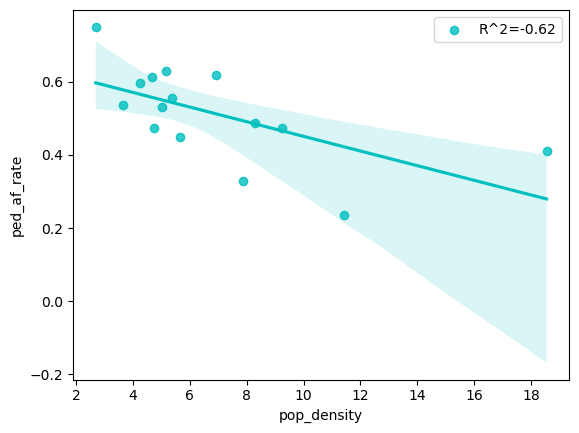

In [41]:
sns.regplot(x="pop_density", y="ped_af_rate", data=linregdf, label='R^2=0.385', color="c").legend(loc="best")

<AxesSubplot:xlabel='pop_density', ylabel='ped_af_rate'>

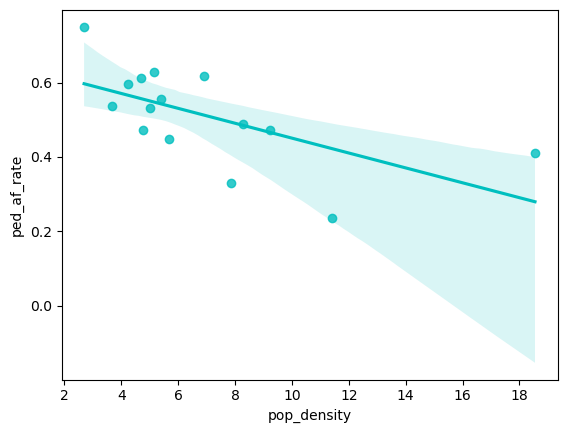

In [42]:
sns.regplot(x=linregdf['pop_density'], y=linregdf['ped_af_rate'], fit_reg = True, color = "c")

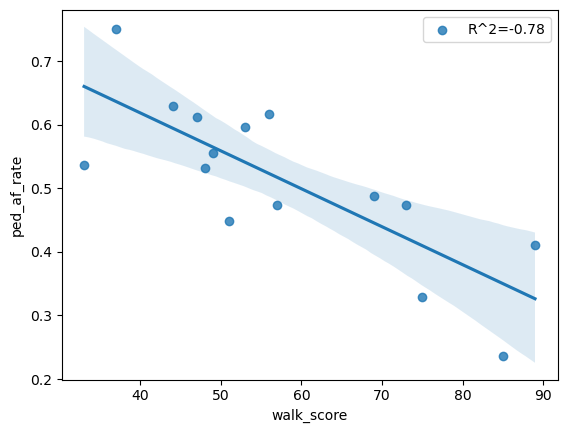

In [43]:
slope_score, intercept_score, r_value_score, pv_score, se_score = stats.linregress(linregdf['walk_score'],linregdf['ped_af_rate'])
sns.regplot(x="walk_score", y="ped_af_rate", data=linregdf, label='R^2={0:.2f}'.format(r_value_score)).legend(loc="best")

<AxesSubplot:xlabel='walk_score', ylabel='ped_af_rate'>

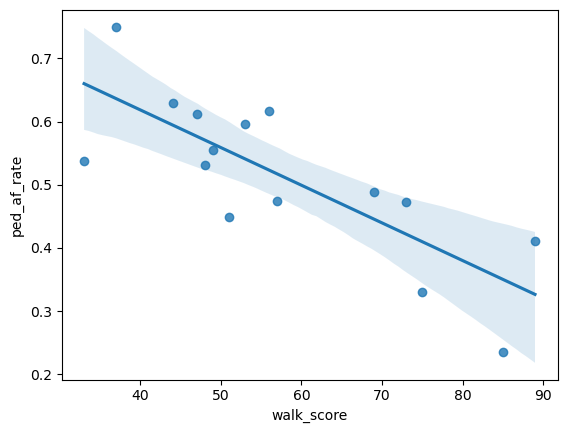

In [44]:
sns.regplot(x=linregdf['walk_score'], y=linregdf['ped_af_rate'], fit_reg = True)

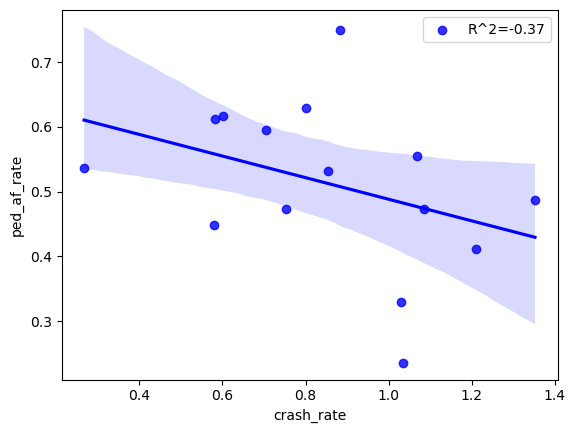

In [45]:
slope_crash, intercept_crash, r_value_crash, pv_crash, se_crash = stats.linregress(linregdf['crash_rate'],linregdf['ped_af_rate'])
sns.regplot(x="crash_rate", y="ped_af_rate", data=linregdf, label='R^2={0:.2f}'.format(r_value_crash), color = "b").legend(loc="best")

<AxesSubplot:xlabel='crash_rate', ylabel='ped_af_rate'>

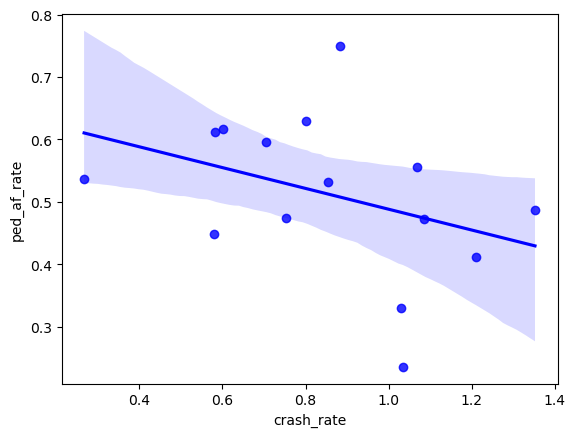

In [46]:
sns.regplot(x=linregdf['crash_rate'], y=linregdf['ped_af_rate'], fit_reg = True, color = "b")

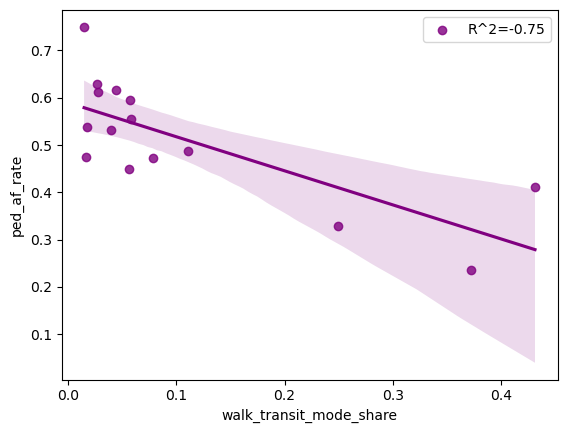

In [47]:
slope_mode, intercept_mode, r_value_mode, pv_mode, se_mode = stats.linregress(linregdf['walk_transit_mode_share'],linregdf['ped_af_rate'])
sns.regplot(x="walk_transit_mode_share", y="ped_af_rate", data=linregdf, label='R^2={0:.2f}'.format(r_value_mode), color = "purple").legend(loc="best")

<AxesSubplot:xlabel='walk_transit_mode_share', ylabel='ped_af_rate'>

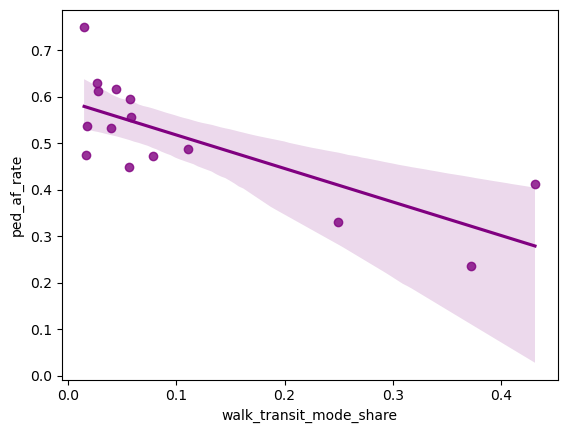

In [48]:
sns.regplot(x=linregdf['walk_transit_mode_share'], y=linregdf['ped_af_rate'], fit_reg = True, color = "purple")

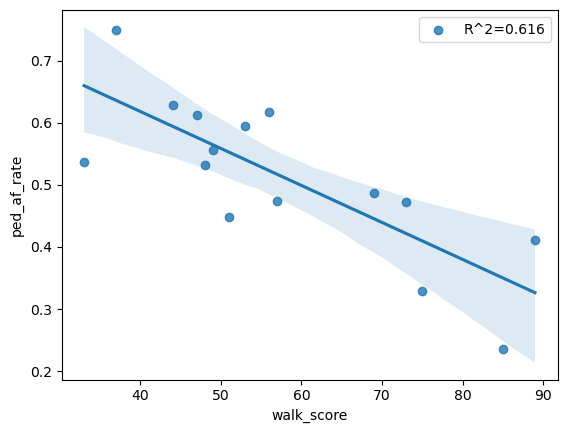

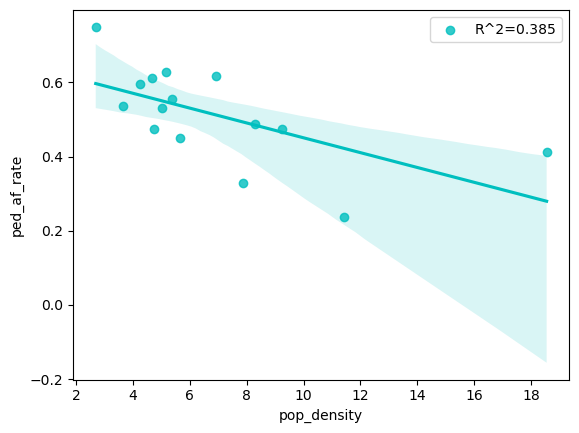

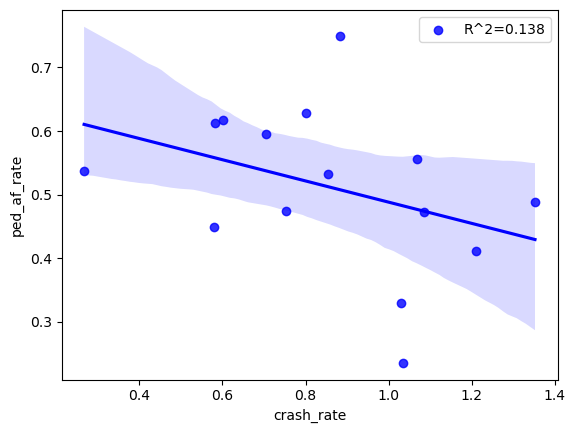

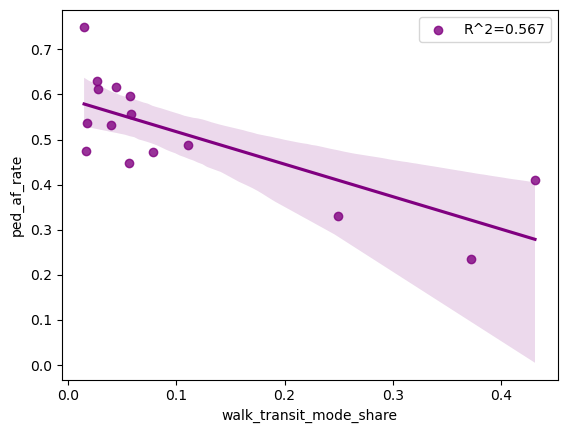

In [126]:
sns.regplot(x="walk_score", y="ped_af_rate", data=linregdf, label='R^2=0.616').legend(loc="best")
plt.show()
sns.regplot(x="walk_transit_mode_share", y="ped_af_rate", data=linregdf, label='R^2=0.567', color = "purple").legend(loc="best")
plt.show()
sns.regplot(x="pop_density", y="ped_af_rate", data=linregdf, label='R^2=0.385', color="c").legend(loc="best")
plt.show()
sns.regplot(x="crash_rate", y="ped_af_rate", data=linregdf, label='R^2=0.138', color = "b").legend(loc="best")
plt.show()


#### 4.b. Crosstab: Vehicle type at fault by pedestrian action - filtered by collision severity

In [49]:
pd.crosstab(df_fatal['ped_action_name'], df_fatal['veh_type_atfault_name'], margins=True, normalize='index')

veh_type_atfault_name,Bicycle,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Passenger Car with Trailer,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Pickup or Panel Truck with Trailer,Schoolbus,Truck or Truck Tractor,Truck or Truck Tractor with Trailer
ped_action_name,,,,,,,,,,,,,
Approaching/Leaving School Bus,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Crossing Not in Crosswalk,0.000909,0.000000,0.000909,0.048182,0.000000,0.000000,0.074545,0.863636,0.008182,0.000000,0.000000,0.003636,0.000000
Crossing in Crosswalk Not at Intersection,0.000000,0.000000,0.029412,0.235294,0.000000,0.000000,0.264706,0.470588,0.000000,0.000000,0.000000,0.000000,0.000000
Crossing in Crosswalk at Intersection,0.001429,0.001429,0.007143,0.210000,0.010000,0.001429,0.388571,0.257143,0.098571,0.001429,0.004286,0.011429,0.007143
"In Road, Including Shoulder",0.001148,0.000000,0.001148,0.133180,0.002296,0.000000,0.157290,0.664753,0.029851,0.002296,0.000000,0.005741,0.002296
Not Stated,0.000000,0.000000,0.000000,0.379310,0.000000,0.000000,0.275862,0.310345,0.034483,0.000000,0.000000,0.000000,0.000000
Not in Road,0.000000,0.000000,0.006849,0.164384,0.000000,0.000000,0.678082,0.020548,0.102740,0.006849,0.000000,0.020548,0.000000
All,0.001041,0.000347,0.003123,0.125260,0.003123,0.000347,0.210618,0.602706,0.041638,0.001388,0.001041,0.006940,0.002429


In [50]:
pd.crosstab(df_severe['ped_action_name'], df_severe['veh_type_atfault_name'], margins=True, normalize='index')

veh_type_atfault_name,Bicycle,Emergency Vehicle,Motorcycle/Scooter,Not Stated,Other Bus,Passenger Car with Trailer,Passenger Car/Station Wagon,Pedestrian,Pickup or Panel Truck,Pickup or Panel Truck with Trailer,Schoolbus,Truck or Truck Tractor,Truck or Truck Tractor with Trailer
ped_action_name,,,,,,,,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Approaching/Leaving School Bus,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Crossing Not in Crosswalk,0.001789,0.000000,0.002147,0.092665,0.001073,0.000000,0.078354,0.818247,0.005725,0.000000,0.000000,0.000000,0.000000
Crossing in Crosswalk Not at Intersection,0.000000,0.000000,0.000000,0.248120,0.000000,0.000000,0.398496,0.323308,0.015038,0.000000,0.007519,0.007519,0.000000
Crossing in Crosswalk at Intersection,0.003965,0.000721,0.006849,0.237563,0.007570,0.000360,0.484138,0.195386,0.055876,0.000721,0.000360,0.006128,0.000360
"In Road, Including Shoulder",0.004972,0.003729,0.001865,0.197638,0.004972,0.000000,0.264761,0.480423,0.029832,0.000622,0.000000,0.008701,0.002486
Not Stated,0.011976,0.005988,0.005988,0.383234,0.000000,0.000000,0.257485,0.299401,0.035928,0.000000,0.000000,0.000000,0.000000
Not in Road,0.036965,0.001946,0.013619,0.227626,0.003891,0.000000,0.620623,0.023346,0.052529,0.000000,0.000000,0.015564,0.003891
All,0.005628,0.001251,0.004627,0.181466,0.004252,0.000125,0.300775,0.463607,0.031766,0.000375,0.000250,0.005003,0.000875


#### 5.a. Visualize the party at-fault rates by City

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<AxesSubplot:title={'center':'Fatal Pedestrian-Involved Collisions in Alameda County: 2012 - 2021'}, xlabel='City', ylabel='number of collisions'>

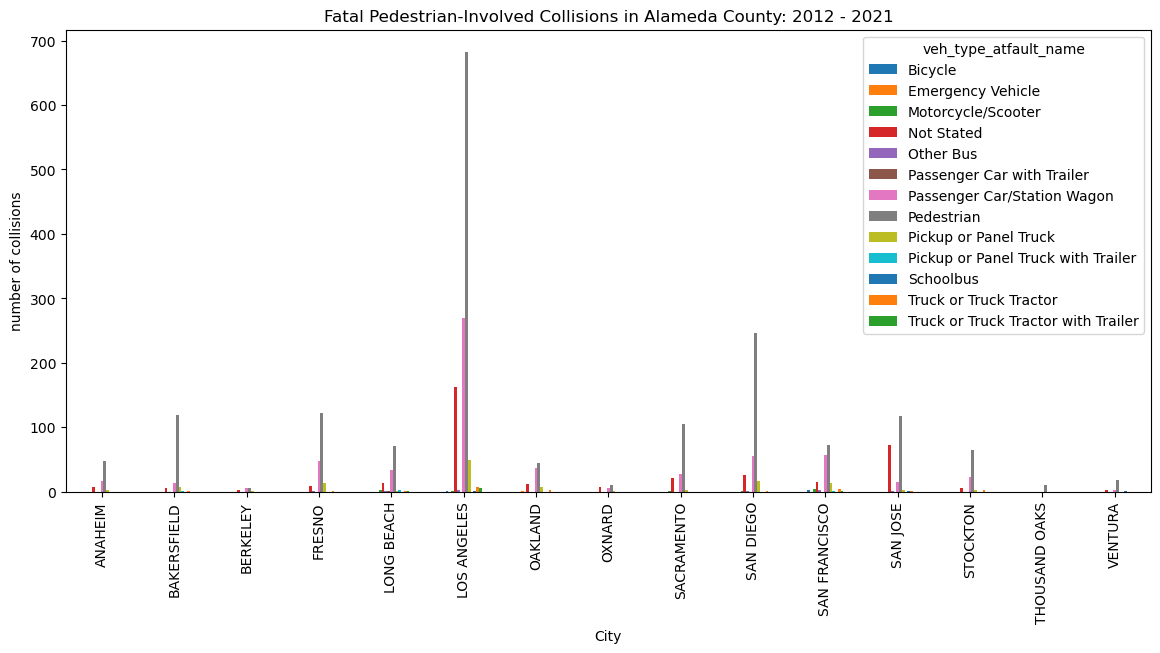

In [52]:
df_fatal.groupby(['CITY', 'veh_type_atfault_name'])['CASE_ID'].count().unstack().plot(
    kind='bar', figsize=(14,6), title='Fatal Pedestrian-Involved Collisions in Alameda County: 2012 - 2021',
    ylabel='number of collisions', xlabel='City')

<AxesSubplot:title={'center':'Severe Pedestrian-Involved Collisions in Alameda County: 2012 - 2021'}, xlabel='City', ylabel='number of collisions'>

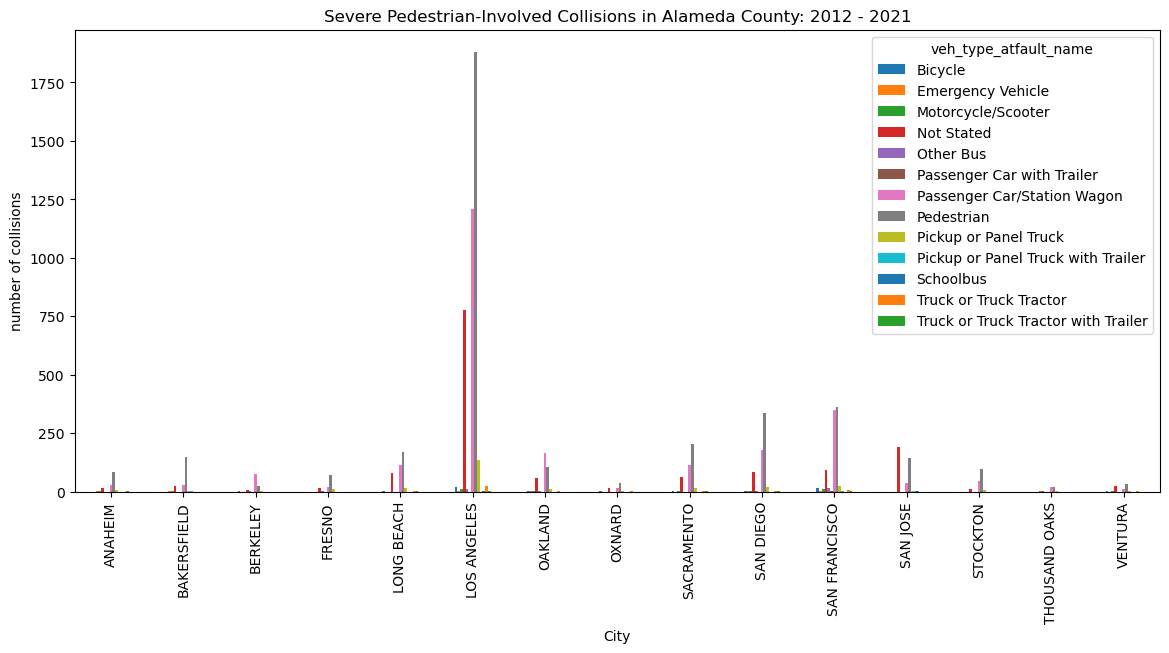

In [53]:
df_severe.groupby(['CITY', 'veh_type_atfault_name'])['CASE_ID'].count().unstack().plot(
    kind='bar', figsize=(14,6), title='Severe Pedestrian-Involved Collisions in Alameda County: 2012 - 2021',
    ylabel='number of collisions', xlabel='City')

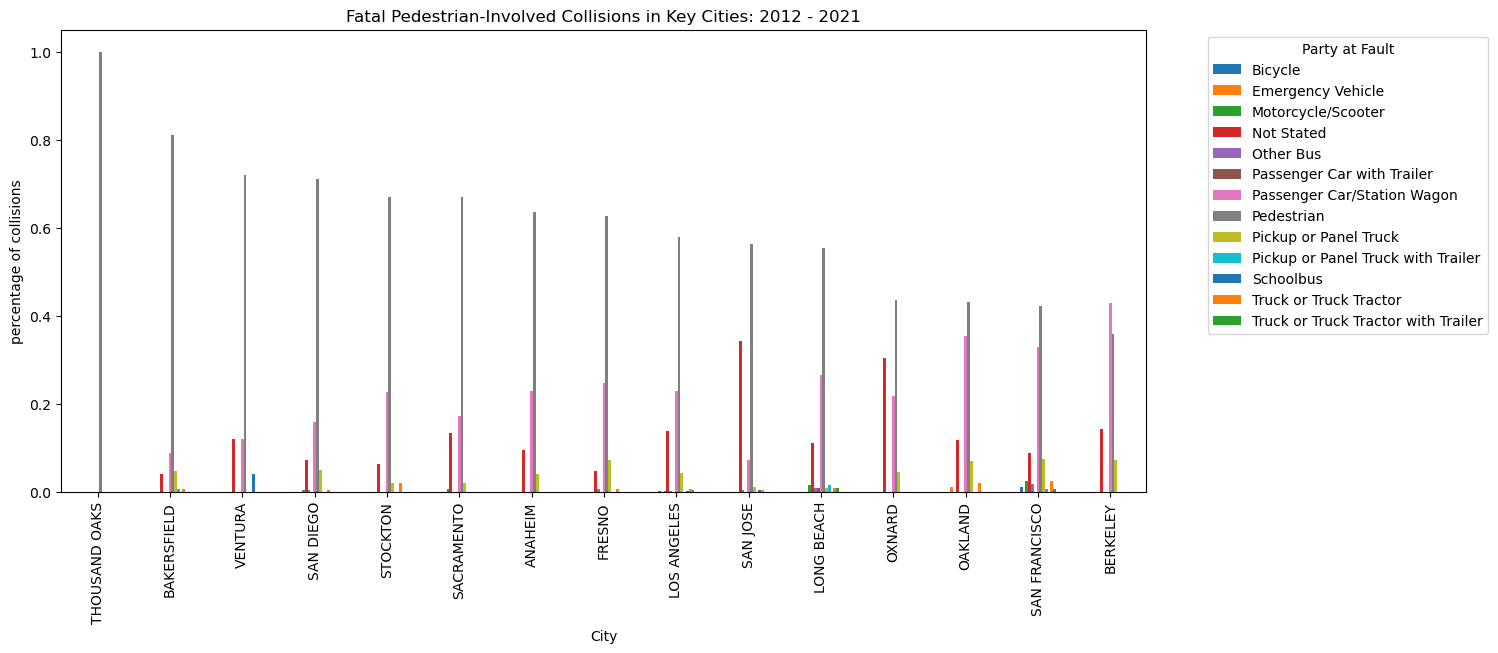

In [54]:
city_f_pct.plot(
    kind='bar', figsize=(14,6), title='Fatal Pedestrian-Involved Collisions in Key Cities: 2012 - 2021',
    ylabel='percentage of collisions', xlabel='City')
plt.legend(title='Party at Fault', bbox_to_anchor=(1.05, 1), loc='upper left')

(0.0, 1.0)

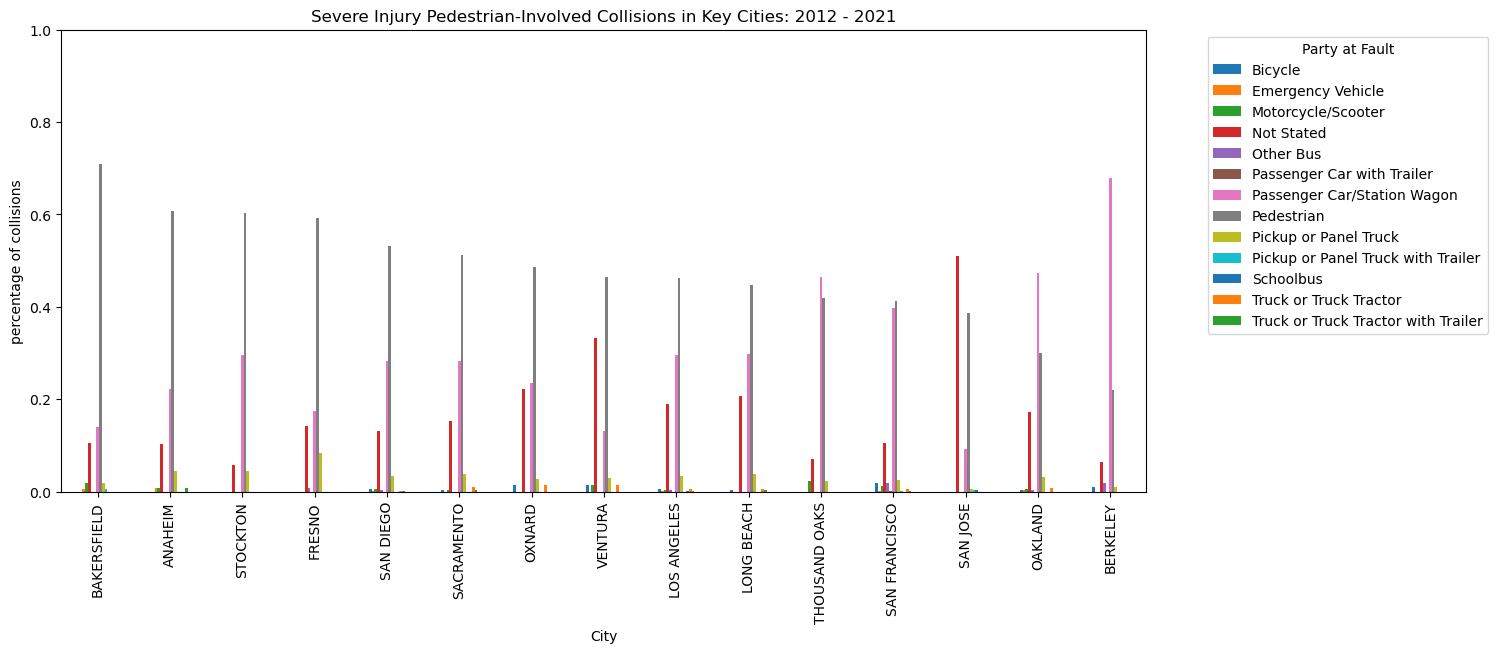

In [55]:
city_s_pct.plot(
    kind='bar', figsize=(14,6), title='Severe Injury Pedestrian-Involved Collisions in Key Cities: 2012 - 2021',
    ylabel='percentage of collisions', xlabel='City')
plt.legend(title='Party at Fault',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.0, 1.0)

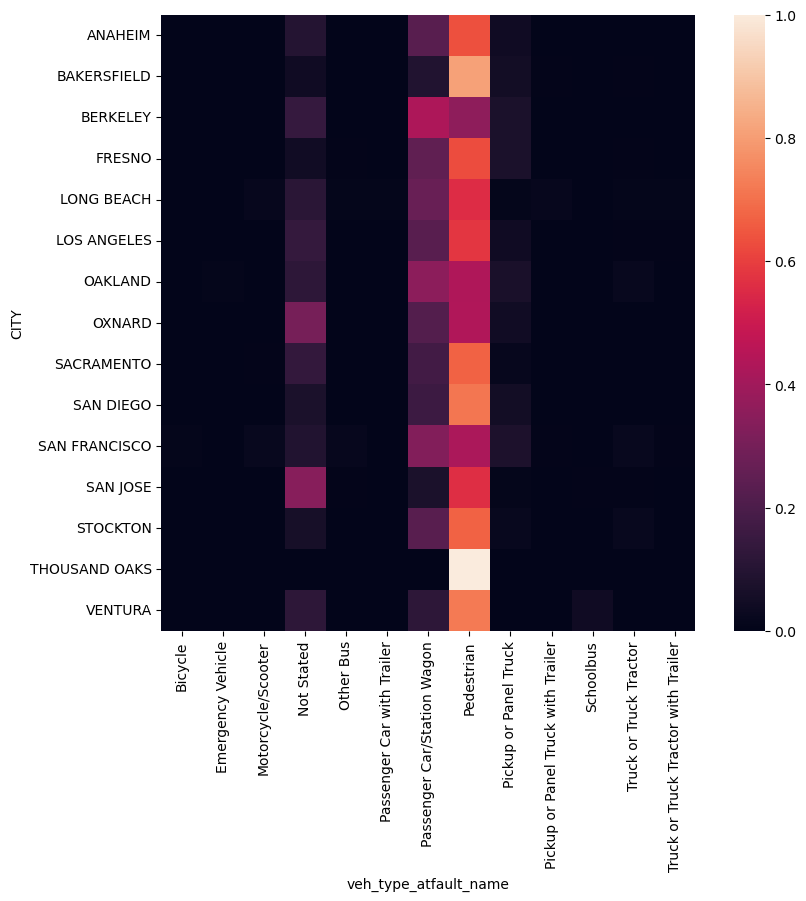

In [56]:
fig, ax = plt.subplots(figsize=(10,8))
fatal_heatmap = sns.heatmap(
    pd.crosstab(df_fatal['CITY'], df_fatal['veh_type_atfault_name'], normalize='index'), square=True, ax=ax)

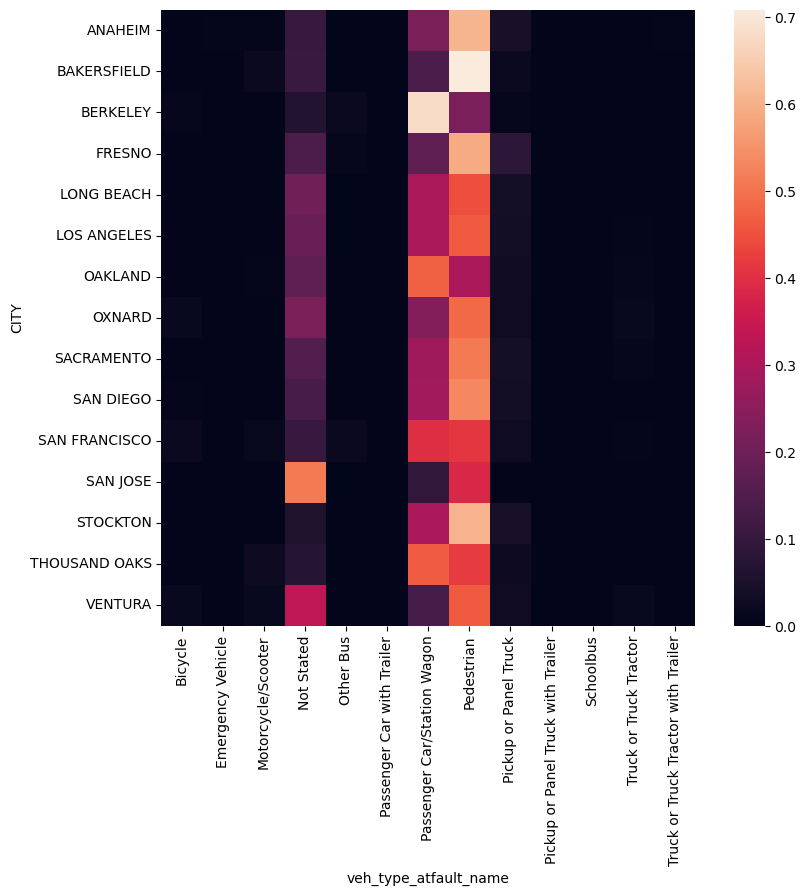

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
severe_heatmap = sns.heatmap(
    pd.crosstab(df_severe['CITY'], df_severe['veh_type_atfault_name'], normalize='index'), square=True, ax=ax)

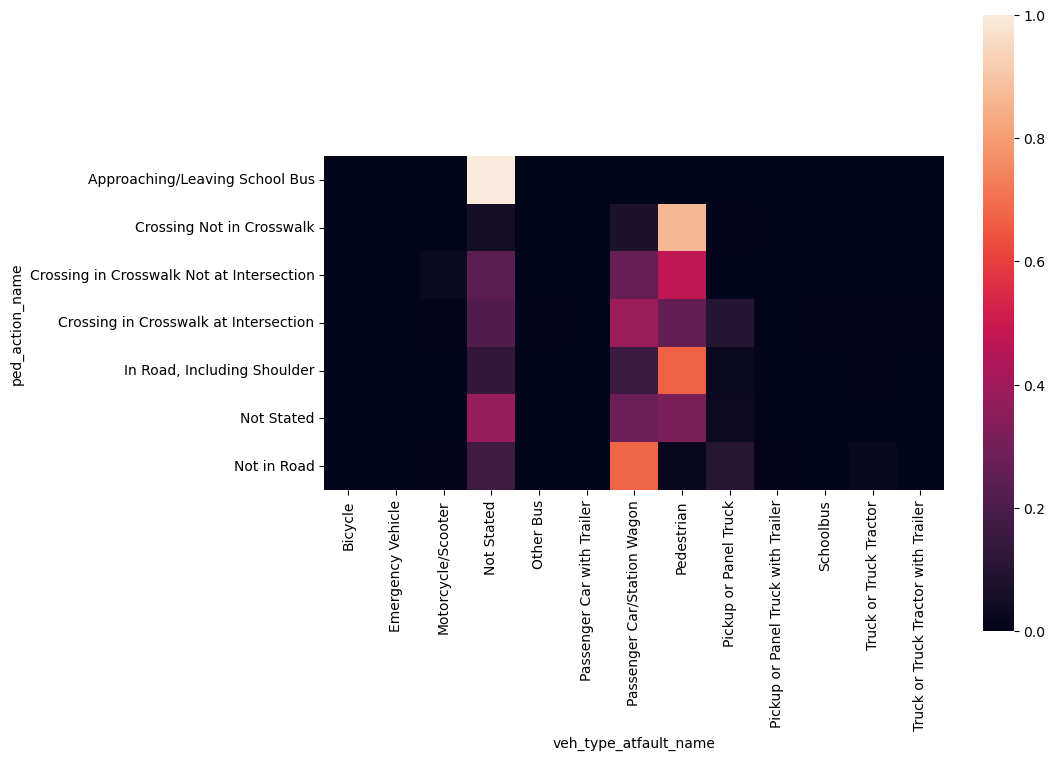

In [58]:
fig, ax = plt.subplots(figsize=(10,8))
fatal_heatmap = sns.heatmap(
    pd.crosstab(df_fatal['ped_action_name'], df_fatal['veh_type_atfault_name'], normalize='index'), square=True, ax=ax)

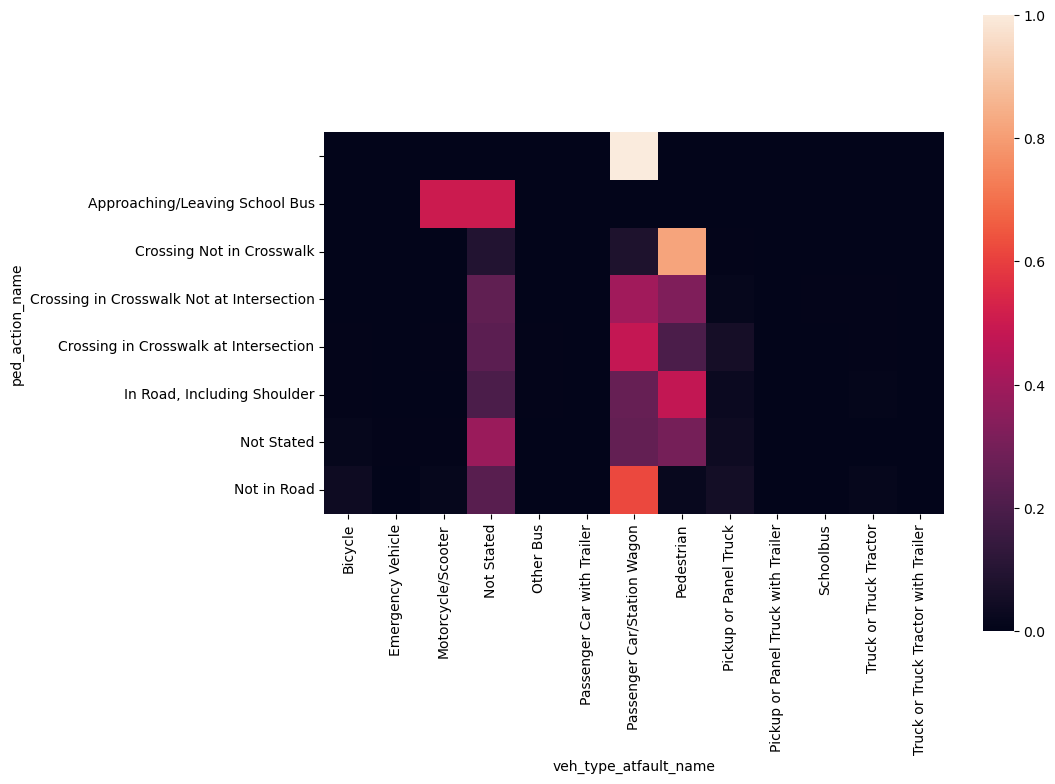

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
fatal_heatmap = sns.heatmap(
    pd.crosstab(df_severe['ped_action_name'], df_severe['veh_type_atfault_name'], normalize='index'), square=True, ax=ax)

#### 6. Interpretation of the data analysis

For this initial analysis, I chose to focus only on traffic collisions in Alameda County (since that is the largest geographic scale queriable from SWITRS), from the entire time range of data available, 2012 to 2021. I wanted to understand the general landscape of how often pedestrians are found at-fault for the collisions in which they're involved, and also if those rates vary between collision severity. I focused only on fatal and severe collisions, since these incidents have the lowest rates of unreporting, and are highest priority for prevention to improve road safety for all users. 

Based on my initial analysis, we can see that for all of Alameda County, pedestrians are found at fault for 47% of all fatal crashes, and 33% of all severe crashes. Immediately this statistic raises an alarming flag - since vehicle speeds are the primary differentiator between a crash being severe or fatal, how is it possible that pedestrians are more often at fault for fatal crashes? This will be incorporated into the research question listed below. 

Additionally, this trend is fairly consistent across cities in Alameday County. Newark, Livermore, Dublin, San Leandro, and Union City have the highest at-fault rates for pedestrians for fatal collisions (although in each of these cities the total number of fatal collisions is much lower than in Oakland). By contrast, many cities found drivers of passenger vehicles more often at fault than pedestrians for severe injury crashes, with the major exceptions of Piedmont, Livermore, Emeryville, Pleasanton, and Union City. 

Lastly, in analyzing the pedestrian action by party at fault, generally pedestrians were found at-fault more often when they were crossing not in a crosswalk or in the road, including the shoulder across both collision severity levels. However, this split was much more stark for severe collisions, pointing to another research question - what is happening in the cases where a pedestrian is struck and killed while crossing in a crosswalk, but found at-fault for the collision?



#### 7. Research question and planned data analysis

For my final project, I plan to assess the existing landscape of at-fault rates for pedestrian-involved collisions in California and determine if there are is correlation between these rates and other urban characteristics/features. I have already done some of this analysis in Excel in my work done on a final paper for a traffic safety class, but I plan to leverage the power of Python to streamline and automate this analysis to assess many more factors. 

My plan for data analysis is as follows:

* Summarize at-fault rates by:
    * city (geographic visualizations)
    * demographic characteristics of victims (race, gender, age)
    * collision factors (pedestrian action, driver action, location in road)
* Perform linear regression analysis to assess potential correlation between at-fault rates and:
    * overal crash rates per capita in the city
    * population density
    * mode share
    * intersection density
    
I plan to perform this analysis primarily utilizing SWITRS California collision data for the 10-15 largest counties in California by population spanning 2012-2021. I also will look for outside data sources to assess correlation to mode share, population density, and intersection density. 

In [60]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

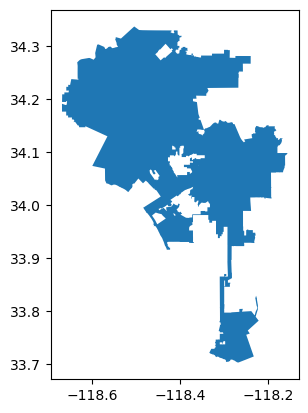

In [61]:
import requests
import geopandas as gpd

census_url = "https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_06_tract10.zip"
tracts = gpd.read_file(census_url)
la_city = gpd.read_file("https://data.lacity.org/api/geospatial/ppge-zfr4?method=export&format=Shapefile")

la_city.plot()

In [62]:
print(tracts.crs)
print(la_city.crs)

EPSG:4269
GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [63]:
la_city_proj = la_city.to_crs(tracts.crs)

In [64]:
socal_cities = ['LOS ANGELES']#change cities here
df_atfault_socal = df_atfault[df_atfault['CITY'].isin(socal_cities)]
df_atfault_socal.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y
1,7190140,2016,1942,3/17/16,2245,N,N,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.310239,33.959960
2,91854786,2021,9590,11/23/21,1857,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.201103,34.055080
3,91066816,2019,9590,2/22/19,1930,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.250572,34.064240
6,8911405,2020,1942,7/16/20,2235,N,N,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.271149,34.003841
8,9019038,2019,1942,11/9/19,325,N,N,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.282723,33.966602


In [141]:
norcal_cities = ['SAN FRANCISCO', 'BERKELEY', 'OAKLAND', 'SAN JOSE']#change cities here
df_atfault_norcal = df_atfault[df_atfault['CITY'].isin(norcal_cities)]
df_atfault_norcal.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y
5764,9136283,2020,109,7/23/20,1153,N,N,2,0,2,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,OAKLAND,-122.261604,37.812733
5766,6855225,2015,103,1/4/15,1756,Y,N,2,0,1,Crossing in Crosswalk at Intersection,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,BERKELEY,-122.278450,37.850580
5767,6855226,2015,103,1/4/15,1516,N,N,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,BERKELEY,-122.283123,37.894274
5768,8036886,2016,103,3/6/16,2246,Y,N,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,ALAMEDA,BERKELEY,-122.277140,37.870970
5770,8502818,2016,109,11/2/16,418,N,N,2,0,1,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,8,ALAMEDA,OAKLAND,-122.277414,37.817869


In [65]:
len(df_atfault_socal)

2565

In [66]:
gdf_atfault_socal = gpd.GeoDataFrame(
    df_atfault_socal, geometry=gpd.points_from_xy(df_atfault_socal.POINT_X, df_atfault_socal.POINT_Y), crs="EPSG:4269"
)
gdf_atfault_socal.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,INTERSECTION,STATE_HWY_IND,COLLISION_SEVERITY,NUMBER_KILLED,NUMBER_INJURED,ped_action_name,prim_col_factor_name,veh_type_atfault_name,pcf_viol_category_name,COUNTY,CITY,POINT_X,POINT_Y,geometry
1,7190140,2016,1942,3/17/16,2245,N,N,1,1,0,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.310239,33.959960,POINT (-118.31024 33.95996)
2,91854786,2021,9590,11/23/21,1857,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.201103,34.055080,POINT (-118.20110 34.05508)
3,91066816,2019,9590,2/22/19,1930,N,Y,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.250572,34.064240,POINT (-118.25057 34.06424)
6,8911405,2020,1942,7/16/20,2235,N,N,1,1,0,"In Road, Including Shoulder",Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.271149,34.003841,POINT (-118.27115 34.00384)
8,9019038,2019,1942,11/9/19,325,N,N,2,0,1,Crossing Not in Crosswalk,Vehicle Code Violation,Pedestrian,Pedestrian Violation,LOS ANGELES,LOS ANGELES,-118.282723,33.966602,POINT (-118.28272 33.96660)


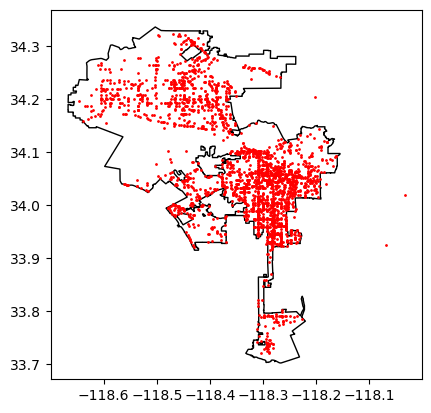

In [67]:
ax = la_city_proj.plot(color="white", edgecolor="black")

gdf_atfault_socal.plot(ax=ax, aspect='equal', color="red", markersize=1)

plt.show()

In [68]:
gdf_la_tracts = gpd.clip(tracts, la_city_proj)

In [69]:
merge_socal = gpd.sjoin(gdf_atfault_socal, gdf_la_tracts, how="inner", predicate='intersects')
merge_socal.head()
len(merge_socal)

2540

In [70]:
tract_socal = merge_socal.groupby('TRACTCE10')['CASE_ID'].count().to_frame(name='total_socal_atfault').reset_index()
tract_socal.head()

,TRACTCE10,total_socal_atfault
0,101210,4
1,101300,2
2,101400,3
3,102103,3
4,102107,3


In [71]:
tract_socal['TRACTCE10'] = tract_socal['TRACTCE10'].astype(int)
gdf_la_tracts['TRACTCE10'] = gdf_la_tracts['TRACTCE10'].astype(int)

In [72]:
gdf_tracts_socal = pd.merge(gdf_la_tracts,tract_socal, how='left', left_on='TRACTCE10', right_on='TRACTCE10')
gdf_tracts_socal.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,total_socal_atfault
0,06,037,273502,06037273502,2735.02,Census Tract 2735.02,G5020,S,593031,193545,+33.9867153,-118.4722260,"POLYGON ((-118.47671 33.98745, -118.47519 33.9...",1.0
1,06,037,273402,06037273402,2734.02,Census Tract 2734.02,G5020,S,622758,387102,+33.9917820,-118.4792291,"POLYGON ((-118.47675 33.98742, -118.47698 33.9...",5.0
2,06,037,273300,06037273300,2733,Census Tract 2733,G5020,S,571893,0,+33.9955518,-118.4722036,"POLYGON ((-118.46711 33.99316, -118.46682 33.9...",2.0
3,06,037,273200,06037273200,2732,Census Tract 2732,G5020,S,641916,0,+33.9975862,-118.4669749,"POLYGON ((-118.46739 33.99353, -118.46767 33.9...",4.0
4,06,037,702102,06037702102,7021.02,Census Tract 7021.02,G5020,S,932895,203768,+34.0009853,-118.4807228,"MULTIPOLYGON (((-118.47019 34.00249, -118.4703...",NaN


In [73]:
print(gdf_tracts_socal['total_socal_atfault'].unique())
print(gdf_tracts_socal['total_socal_atfault'].dtype)

[ 1.  5.  2.  4. nan  6.  8.  3. 11. 10. 12.  7. 17.  9. 20. 14. 31.]
float64


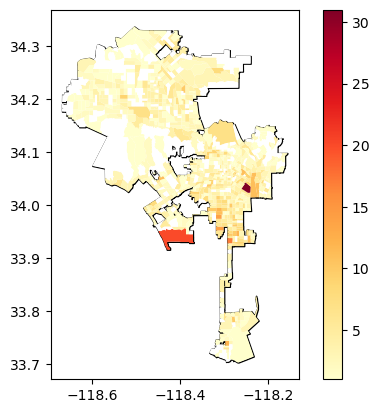

In [75]:
ax = la_city_proj.plot(color="white", edgecolor="black")
gdf_tracts_socal.plot(column='total_socal_atfault', cmap='YlOrRd', ax=ax, figsize=(45,30), legend=True, missing_kwds={'color': 'white'})
plt.show()

In [102]:
outlines = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_500k.zip')
outlines = outlines[outlines['GEOID'] == '06']  # just CA
print(outlines.crs)

EPSG:4269


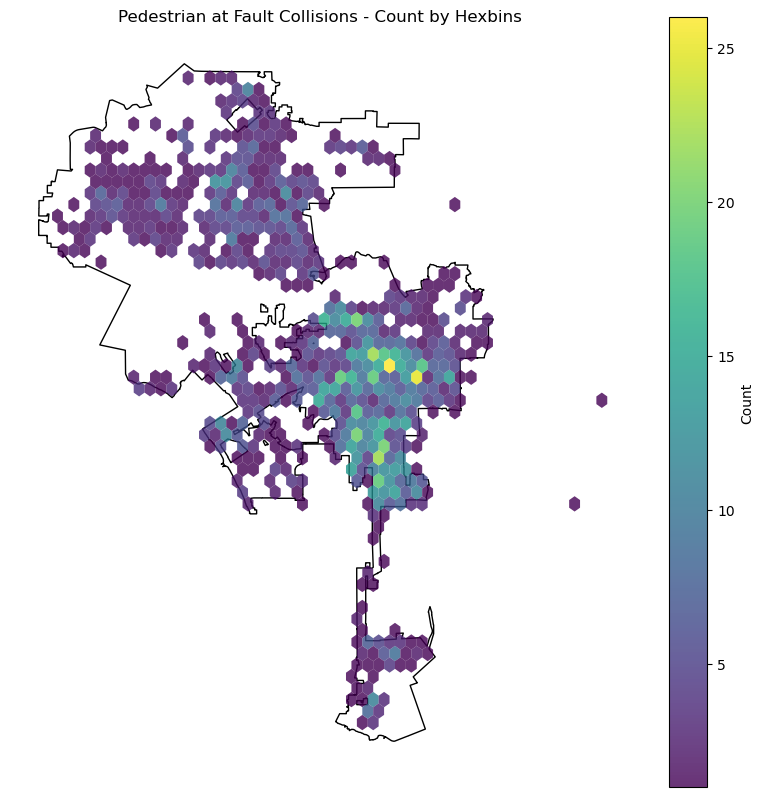

In [120]:
fig, ax = plt.subplots(figsize=(10,10))

# Plot coastline using GeoPandas
la_city_proj.plot(ax=ax, color="white", edgecolor="black")

# Plot hexbins of storefronts using Matplotlib
hb = plt.hexbin(df_atfault_socal.POINT_X, df_atfault_socal.POINT_Y, mincnt=1, gridsize=50, alpha=.8, lw=0)

# Add a key
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Count')

# Title and bounds
ax.set_title('Pedestrian at Fault Collisions - Count by Hexbins')

ax.axis('off')
plt.show()

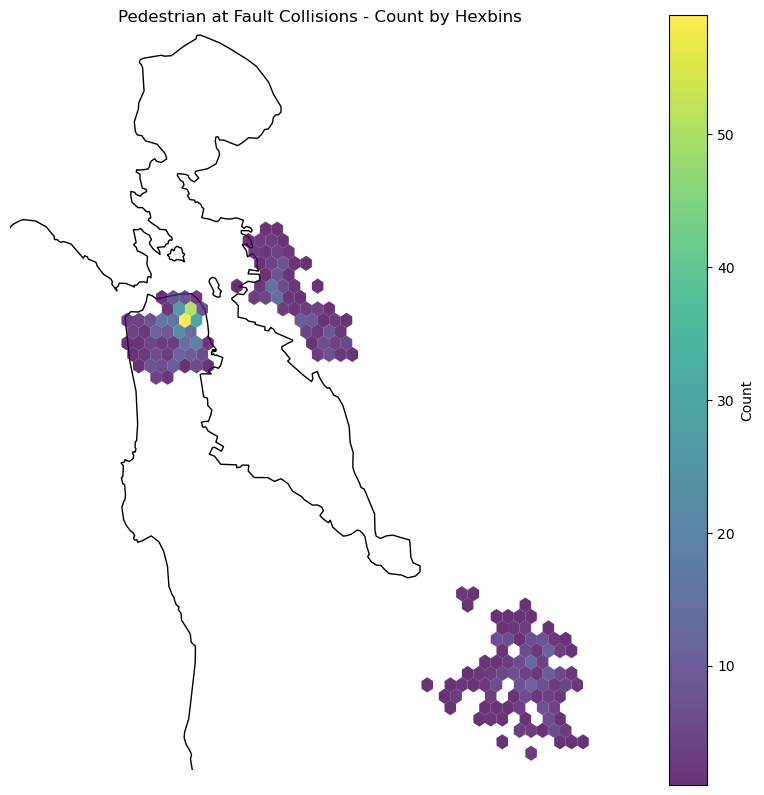

In [151]:
fig, ax = plt.subplots(figsize=(10,10))

# Plot coastline using GeoPandas
outlines.plot(ax=ax, color="white", edgecolor="black")

# Plot hexbins of storefronts using Matplotlib
hb = plt.hexbin(df_atfault_norcal.POINT_X, df_atfault_norcal.POINT_Y, mincnt=1, gridsize=40, alpha=.8, lw=0)

# Add a key
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Count')

# Title and bounds
ax.set_title('Pedestrian at Fault Collisions - Count by Hexbins')
ax.set_xlim((-122.7, -121.7))
ax.set_ylim((37.2, 38.15))

ax.axis('off')
plt.show()

In [80]:
print(la_city.crs)

GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [86]:
la_streets_proj = la_streets.to_crs(tracts.crs)
la_streets_proj.head()

,ASSETID,INT_ID_FROM,INT_ID_TO,STNUM,MAPSHEET,ID,ADRF,ADRT,ZIP_R,ADLF,...,TOOLTIP,NLA_URL,Planning_ASSETID,TYPE,MODIFIED,Street_Designation,Street_Designation_WO_Mod,AutoID,OBJECTID,geometry
0,2028,50406,50396,1871.0,094-5A199,75652,9017,9125,90044.0,0,...,VERMONT AVE\nStreet Designation: Unidentified,navigatela/reports/centerline_mb.cfm?pk=2028&t...,None,None,None,Unidentified,Unidentified,1817,1871,"LINESTRING (-118.29182 33.95458, -118.29182 33..."
1,2103,50451,50455,2576.0,108B213,66450,1680,1798,90058.0,0,...,SLAUSON AVE\nStreet Designation: Unidentified,navigatela/reports/centerline_mb.cfm?pk=2103&t...,None,None,None,Unidentified,Unidentified,1881,1941,"LINESTRING (-118.24380 33.98929, -118.24117 33..."
2,2181,1100,1103,1211.0,099B189,1836,7831,7899,90043.0,7830,...,8TH AVE\nStreet Designation: Unidentified,navigatela/reports/centerline_mb.cfm?pk=2181&t...,None,None,None,Unidentified,Unidentified,1948,2016,"LINESTRING (-118.32649 33.96817, -118.32649 33..."
3,2248,58296,18021,5116.0,015B193,83750,0,0,90731.0,0,...,LELAND ST\nStreet Designation: Unidentified,navigatela/reports/centerline_mb.cfm?pk=2248&t...,None,None,None,Unidentified,Unidentified,2010,2079,"LINESTRING (-118.30116 33.73790, -118.30116 33..."
4,2275,22797,22714,6572.0,144B181,22678,7151,7199,90046.0,7150,...,FOUNTAIN AVE\nStreet Designation: Unidentified,navigatela/reports/centerline_mb.cfm?pk=2275&t...,None,None,None,Unidentified,Unidentified,2036,2106,"LINESTRING (-118.34518 34.09434, -118.34625 34..."


In [85]:
merge_la_streets = gpd.sjoin_nearest(gdf_atfault_socal, la_streets_proj, how="inner")
merge_la_streets.head()
len(merge_la_streets)

/Users/rachelstrangeway/opt/anaconda3/lib/python3.9/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


2611

In [87]:
street_la = merge_la_streets.groupby('ASSETID')['CASE_ID'].count().to_frame(name='total_socal_atfault').reset_index()
street_la.head()

,ASSETID,total_socal_atfault
0,2028,99
1,2103,7
2,2181,4
3,2275,1
4,2360,6


In [ ]:
street_la['ASSETID'] = street_la['ASSETID'].astype(int)
la_streets_proj['ASSETID'] = la_streets_proj['ASSETID'].astype(int)

In [88]:
gdf_streets_la = pd.merge(la_streets_proj,street_la, how='left', left_on='ASSETID', right_on='ASSETID')
gdf_streets_la.head()

,ASSETID,INT_ID_FROM,INT_ID_TO,STNUM,MAPSHEET,ID,ADRF,ADRT,ZIP_R,ADLF,...,NLA_URL,Planning_ASSETID,TYPE,MODIFIED,Street_Designation,Street_Designation_WO_Mod,AutoID,OBJECTID,geometry,total_socal_atfault
0,2028,50406,50396,1871.0,094-5A199,75652,9017,9125,90044.0,0,...,navigatela/reports/centerline_mb.cfm?pk=2028&t...,None,None,None,Unidentified,Unidentified,1817,1871,"LINESTRING (-118.29182 33.95458, -118.29182 33...",99.0
1,2103,50451,50455,2576.0,108B213,66450,1680,1798,90058.0,0,...,navigatela/reports/centerline_mb.cfm?pk=2103&t...,None,None,None,Unidentified,Unidentified,1881,1941,"LINESTRING (-118.24380 33.98929, -118.24117 33...",7.0
2,2181,1100,1103,1211.0,099B189,1836,7831,7899,90043.0,7830,...,navigatela/reports/centerline_mb.cfm?pk=2181&t...,None,None,None,Unidentified,Unidentified,1948,2016,"LINESTRING (-118.32649 33.96817, -118.32649 33...",4.0
3,2248,58296,18021,5116.0,015B193,83750,0,0,90731.0,0,...,navigatela/reports/centerline_mb.cfm?pk=2248&t...,None,None,None,Unidentified,Unidentified,2010,2079,"LINESTRING (-118.30116 33.73790, -118.30116 33...",NaN
4,2275,22797,22714,6572.0,144B181,22678,7151,7199,90046.0,7150,...,navigatela/reports/centerline_mb.cfm?pk=2275&t...,None,None,None,Unidentified,Unidentified,2036,2106,"LINESTRING (-118.34518 34.09434, -118.34625 34...",1.0


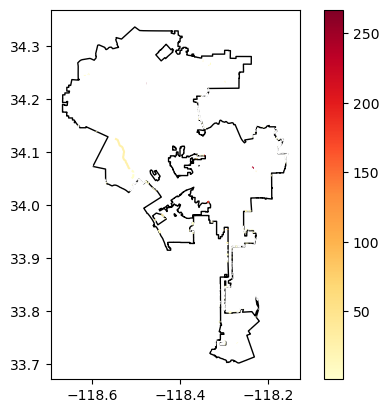

In [94]:
ax = la_city_proj.plot(color="white", edgecolor="black")
gdf_streets_la.plot(column='total_socal_atfault', cmap='YlOrRd', ax=ax, figsize=(45,30), legend=True, markersize=10, missing_kwds={'color': 'white'})
plt.show()

In [ ]:
print(gdf_tract_socal.geometry.head())

In [ ]:
print(gdf_tract_socal.total_socal_atfault.head())

In [ ]:
print(gdf_tract_socal['total_socal_atfault'].describe())

In [ ]:
gdf_tracts_socal = pd.merge(gdf_la_tracts,tract_socal, how='left', left_on='TRACTCE10', right_on='TRACTCE10')
gdf_tracts_socal.head()

In [ ]:
tract_socal['TRACTCE10'] = tract_socal['TRACTCE10'].astype(tracts['TRACTCE10'].dtype)
